Aditya Vijay Shinde

# PROBLEM 1
1. Perceptron Algorithm (15 Marks)

(a) Create and plot a linearly separable dataset in 2D with at least 1000 data points. Clearly label the two classes. (3 marks)

(b) Train the Perceptron Learning Algorithm on this dataset. Plot the decision boundary after training . (5 marks)


(c) Add noise to the dataset by flipping the labels of 10% of the points.
• Plot the noisy dataset.
• Train the Perceptron Learning Algorithm for different numbers of iterations.
• Compare the results visually (decision boundaries) and quantitatively (accuracy or number of misclassifications).
(7 marks)

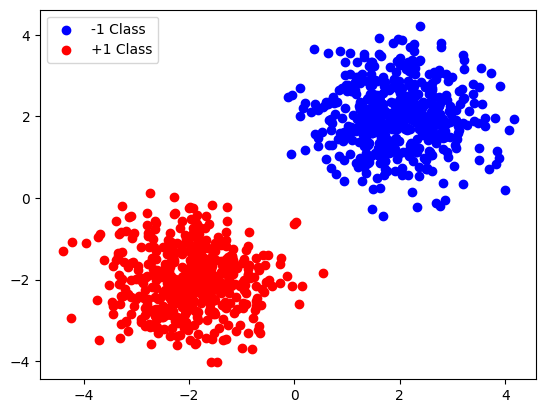

In [ ]:
#1a) Create and plot a linearly separable dataset in 2D with at least 1000 data points. Clearly label the two classes.
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Number of points per class
n = 500

# Generate class -1
c0 = np.random.randn(n, 2) * 0.8 + [2, 2]
l0 = np.full(n, -1)

# Generate class +1
c1 = np.random.randn(n, 2) * 0.8 + [-2, -2]
l1 = np.full(n, 1)

# Combine dataset
X = np.vstack((c0, c1))
y = np.hstack((l0, l1))

# Plot
plt.scatter(c0[:, 0], c0[:, 1], color='b', label='-1 Class')
plt.scatter(c1[:, 0], c1[:, 1], color='r', label='+1 Class')
plt.legend()
plt.show()


Perceptron Accuracy: 100.00%


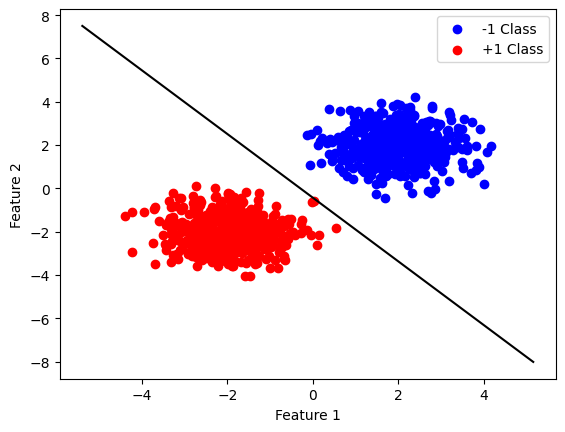

In [ ]:
#(b) Train the Perceptron Learning Algorithm on this dataset. Plot the decision boundary after training . (5 marks)
import numpy as np
import matplotlib.pyplot as plt

def perceptron(X, y, iters=1000, step=1.0):
    weights = np.zeros(X.shape[1])
    bias = 0.0

    for _ in range(iters):
        errors = 0
        for xi, target in zip(X, y):
            if target * (np.dot(xi, weights) + bias) <= 0:
                weights += step * target * xi
                bias += step * target
                errors += 1
        if errors == 0:
            break
    return weights, bias

# Train the perceptron
weights, bias = perceptron(X, y)

# Compute accuracy
predictions = np.sign(np.dot(X, weights) + bias)
accuracy = 100 * np.mean(predictions == y)
print(f"Perceptron Accuracy: {accuracy:.2f}%")

# Plot the dataset
plt.scatter(c0[:, 0], c0[:, 1], color='b', label='-1 Class')
plt.scatter(c1[:, 0], c1[:, 1], color='r', label='+1 Class')

# Decision boundary: w1*x1 + w2*x2 + b = 0 -> x2 = -(w1*x1 + b)/w2
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
if weights[1] != 0:
    y_vals = -(weights[0] * x_vals + bias) / weights[1]
    plt.plot(x_vals, y_vals, 'k-')
else:
    plt.axvline(x=-bias / weights[0], color='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()





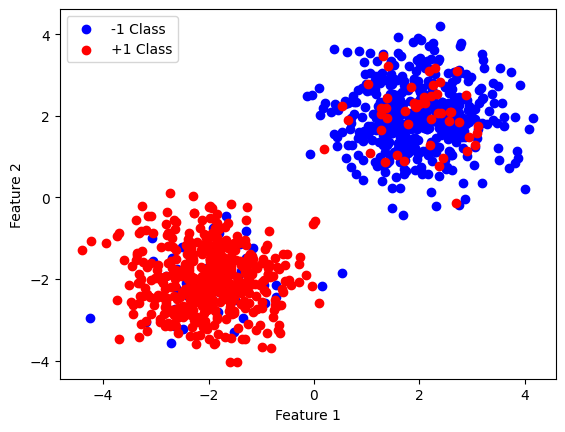

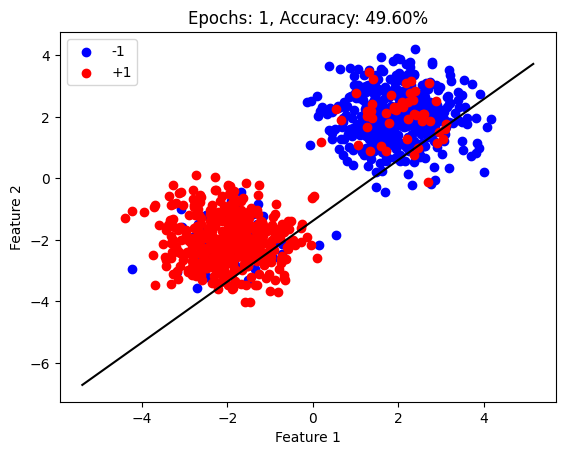

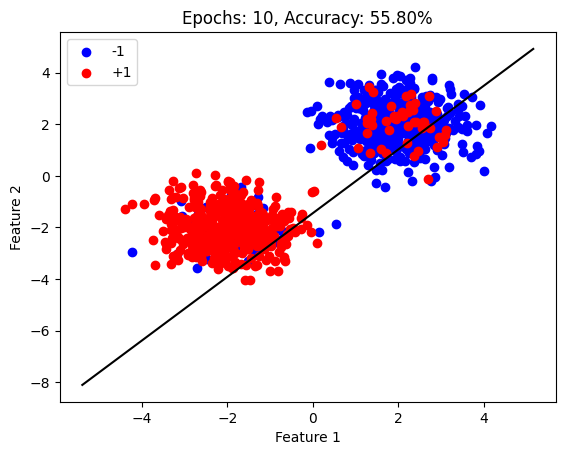

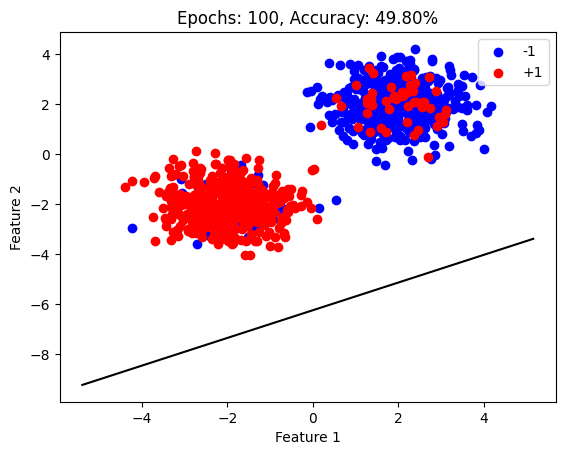

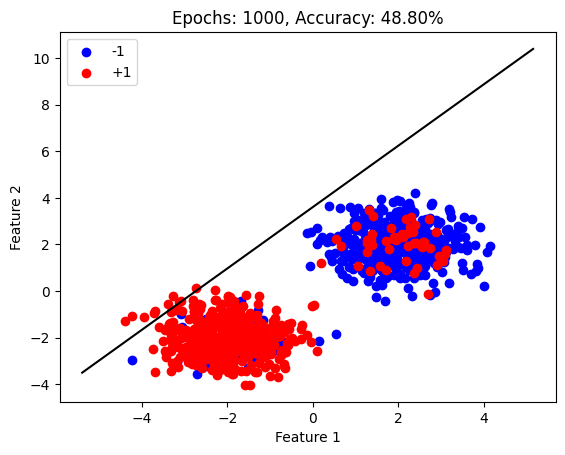

Epochs	Accuracy (%)
1	49.60
10	55.80
100	49.80
1000	48.80


In [ ]:
#Q1c) Add noise to the dataset by flipping the labels of 10% of the points.
#• Plot the noisy dataset.
#• Train the Perceptron Learning Algorithm for different numbers of iterations.
#• Compare the results visually (decision boundaries) and quantitatively (accuracy or number of misclassifications).
import numpy as np
import matplotlib.pyplot as plt

# Add noise by flipping 10% of the labels
np.random.seed(1)
n_flip = int(0.1 * len(y))
flip_idx = np.random.choice(len(y), size=n_flip, replace=False)
y_noise = y.copy()
y_noise[flip_idx] *= -1

# Plot noisy dataset
plt.scatter(X[y_noise == -1, 0], X[y_noise == -1, 1], color='b', label='-1 Class')
plt.scatter(X[y_noise == 1, 0], X[y_noise == 1, 1], color='r', label='+1 Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Train perceptron function
def perceptron(X, y, iters=1000, step=1.0):
    w = np.zeros(X.shape[1])
    b = 0
    for _ in range(iters):
        err = 0
        for xi, target in zip(X, y):
            if target * (np.dot(xi, w) + b) <= 0:
                w += step * target * xi
                b += step * target
                err += 1
        if err == 0:
            break
    pred = np.sign(np.dot(X, w) + b)
    acc = 100 * (len(y) - np.sum(pred != y)) / len(y)
    return w, b, acc

# Train Perceptron on noisy dataset for different epochs
iters_list = [1, 10, 100, 1000]
results = []

for iters in iters_list:
    w, b, acc = perceptron(X, y_noise, iters=iters)
    results.append((iters, acc))

    plt.scatter(X[y_noise == -1, 0], X[y_noise == -1, 1], color='b', label='-1')
    plt.scatter(X[y_noise == 1, 0], X[y_noise == 1, 1], color='r', label='+1')

    # Compute decision boundary
    x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    if w[1] != 0:
        y_vals = -(w[0] * x_vals + b) / w[1]
        plt.plot(x_vals, y_vals, 'k-')
    else:
        plt.axvline(x=-b / w[0], color='k')

    plt.title(f"Epochs: {iters}, Accuracy: {acc:.2f}%")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Output comparison
print("Epochs\tAccuracy (%)")
for iters, acc in results:
    print(f"{iters}\t{acc:.2f}")


# Problem 2
Gradient Descent (10 Marks)

(a) Choose an appropriate loss function (e.g., Log Loss, Hinge Loss) for binary classification and explain why you chose it. (3 marks)

(b) Use Gradient Descent to classify the dataset for both cases:

• Linearly separable dataset (from Q1a).

• Noisy dataset (from Q1c).

Tasks:

• Train the Gradient Descent algorithm on the datasets.

• Plot the decision boundaries for both cases.

• Compare the performance of Gradient Descent with the Perceptron Algorithm in terms of accuracy and sensitivity to noise. (7 marks)

# Loss Function used- Hinge Loss

**Reason for Using Hinge Loss:**

1. Optimizing Margin (SVM-like Behaviour)

Hinge loss pushes the model in a direction that classifies instances correctly while forcing them to remain away from the decision boundary, thus improving generalization and making the classifier resistant to overfitting.

2. Improved noise handling

Unlike the Perceptron loss, hinge loss penalizes points that are correctly classified but quite close to the decision boundary in addition to misclassified points. This enforces a margin that helps reduce noise.

3. Gradient Descent Compatibility

Hinge loss is differentiable everywhere except at the hinge point where [y(w^Tx+b)=1]. It thus allows for smooth weight updates with gradient descent.


4. Alternative to Logistic Loss-for SVM-like Models

Logistic loss gives penalties based on probability in classification errors. Hinge loss penalizes margin violation directly, and hence this works well for margin-based classifiers, in this case, SVMs. Strictly Different from P

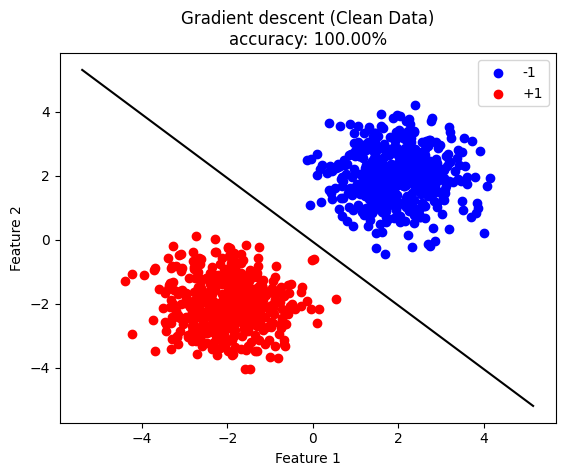

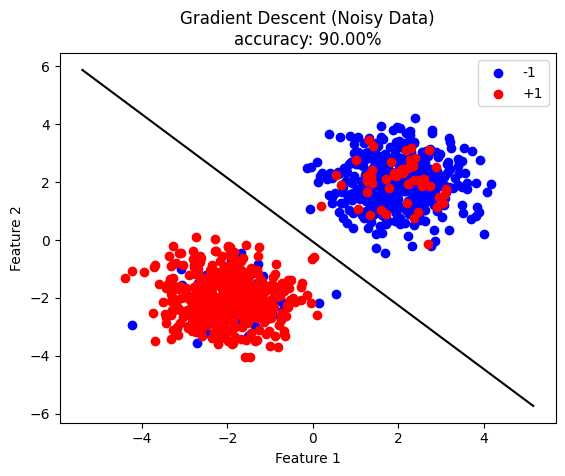


--- Performance on Linearly Seprable Data ---
Perceptron Accuracy: 100.00%
Gradient Descent Accuracy: 100.00%

--- Performance on Noisy Data ---
Perceptron Accuracy: 55.80%
Gradient Descent Accuracy: 90.00%


In [ ]:
# This code is for Gradient descent for linearly seprable and noisy datasets. Loss function we used is Hinge Loss
import numpy as np
import matplotlib.pyplot as plt

# Train Gradient Descent with hinge loss
def train_gd(X, y, step=0.01, iters=1000):
    w, b = np.zeros(X.shape[1]), 0
    for _ in range(iters):
        grad_w, grad_b = np.zeros_like(w), 0
        for xi, label in zip(X, y):
            if label * (np.dot(xi, w) + b) < 1:
                grad_w -= label * xi
                grad_b -= label
        w -= step * grad_w / len(y)
        b -= step * grad_b / len(y)
    return w, b

# Predict function
def predict(X, w, b):
    return np.sign(np.dot(X, w) + b)

# Plot decision boundary
def plot_boundary(w, b, X, y, title):
    plt.scatter(X[y == -1, 0], X[y == -1, 1], color='b', label='-1')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='r', label='+1')

    x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
    if w[1] != 0:
        y_vals = -(w[0] * x_vals + b) / w[1]
        plt.plot(x_vals, y_vals, 'k-')
    else:
        plt.axvline(x=-b / w[0], color='k')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title(title)
    plt.show()

# Train on clean and noisy datasets
w_clean, b_clean = train_gd(X, y)
w_noisy, b_noisy = train_gd(X, y_noise)

# Compute accuracies
acc_clean = 100 * np.mean(predict(X, w_clean, b_clean) == y)
acc_noisy = 100 * np.mean(predict(X, w_noisy, b_noisy) == y_noise)

# Plot decision boundaries
plot_boundary(w_clean, b_clean, X, y, title=f"Gradient descent (Clean Data)\naccuracy: {acc_clean:.2f}%")
plot_boundary(w_noisy, b_noisy, X, y_noise, title=f"Gradient Descent (Noisy Data)\naccuracy: {acc_noisy:.2f}%")

# Compare with Perceptron results
if 'results' in globals() and results:
    acc_perceptron_noisy = max(item[-1] for item in results)
else:
    acc_perceptron_noisy = 0

#**************** Performance Comparison of Perceptron and Gradient descent for Linearly Seprable and Noisy dataset*****************************
print("\n--- Performance on Linearly Seprable Data ---")
print(f"Perceptron Accuracy: {accuracy:.2f}%")
print(f"Gradient Descent Accuracy: {acc_clean:.2f}%")

print("\n--- Performance on Noisy Data ---")
print(f"Perceptron Accuracy: {acc_perceptron_noisy:.2f}%")
print(f"Gradient Descent Accuracy: {acc_noisy:.2f}%")


# **Interpretation of Results**

# Linearly Separable Data:

- Perceptron and Gradient Descent both obtained an accuracy of 100%.

- That is, for perfectly separable data, both algorithms will be able to correctly classify all the points.

# Noisy Data:

- Perceptron: Accuracy=55.80% → the Perceptron fails miserably on noisy data and many points are misclassified.

- Gradient Descent: Accuracy=90.00% → Gradient Descent handles noise much better and is less erroneous.


# Reason-

- The Perceptron can only be well suited for fully separable data. If noise is present, it keeps adjusting its weights by trying to fit all the points and results in poor generalization.

- Gradient Descent optimizes a loss function, which helps in finding an optimal decision boundary that minimizes the overall mistake instead of fitting all the single points.

# Conclusion:
- If clean data is considered, then both algorithms work effectively.
- If noise is in the data, then Gradient Descent is more robust and possesses significantly better accuracy.


# PROBLEM 3

MLP with a single hidden layer
[25 = dataset creation 3 + MLP definition 5 + forwardprop 5 + backprop 5 + performance analysis 7]

Consider a regression analysis dataset with two features and 1000 non-linear samples in 2D. Train a Multi-layer perceptron (MLP) with a single hidden layer for this regression task. Experiment with the following variations and comment on its performance:

(a) Weight initializations: zero versus random weights

(b) Two different learning rates

(c) Two loss functions of your choice

(d) Change the number of nodes in hidden layer and compare

Justify your difference in performance in terms of loss values, convergence rates, fitting curves, etc.,

with plots. All the steps in MLP training have to be implemented from scratch, including forward pass, backward pass, gradient descent, loss functions, and activation functions. You are allowed to reuse parts of your code from the previous question. For dataset creation, you are allowed to use
predefined functions from libraries like numpy, scipy, etc.

In [ ]:
# This code is for MLP with single layer
# Dataset used here is of regression
## Many variations are made as given in problem statement and results are plotted
#Justification of each plot is provided below the plot

## Data generation
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def generate_data():
    np.random.seed(42)
    X = np.random.rand(1000, 2) * 2 - 1
    y = X[:, 0]**2 + X[:, 1]**2 + 0.1 * np.random.randn(1000)
    return X, y.reshape(-1, 1)

def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return x > 0

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# MLP definition with single hidden layer
class MLP:
    def __init__(self, x_dim, h_dim, y_dim, init_method='random'):
        if init_method == 'zero':
            self.W1 = np.zeros((x_dim, h_dim))
            self.W2 = np.zeros((h_dim, y_dim))
        else:
            self.W1 = np.random.randn(x_dim, h_dim) * 0.01
            self.W2 = np.random.randn(h_dim, y_dim) * 0.01

        self.b1 = np.zeros((1, h_dim))
        self.b2 = np.zeros((1, y_dim))
# Forward pass
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)
        return np.dot(self.a1, self.W2) + self.b2
# Backward pass
    def train(self, X, y, epochs=1000, lr=0.01, loss_type='mse'):
        losses = []
        for _ in range(epochs):
            y_pred = self.forward(X)

            # Loss Functions
            loss = mse(y, y_pred) if loss_type == 'mse' else mae(y, y_pred)
            losses.append(loss)

            m = X.shape[0]

            dy = 2 * (y_pred - y) / m if loss_type == 'mse' else np.sign(y_pred - y) / m

            dW2 = np.dot(self.a1.T, dy)
            db2 = np.sum(dy, axis=0, keepdims=True)

            dh = np.dot(dy, self.W2.T) * relu_deriv(self.a1)
            dW1 = np.dot(X.T, dh)
            db1 = np.sum(dh, axis=0, keepdims=True)

            self.W2 -= lr * dW2
            self.b2 -= lr * db2
            self.W1 -= lr * dW1
            self.b1 -= lr * db1

        return losses

In [ ]:
## This code is for convergence plotting
# Function to fit convergence curve
def fit_convergence(epochs, losses):
    """Fit an exponential decay curve to the loss values"""
    def exp_decay(x, a, b, c):
        return a * np.exp(-b * x) + c

    try:
        # Normalize epochs to prevent overflow
        x_normalized = epochs / np.max(epochs)
        popt, _ = curve_fit(exp_decay, x_normalized, losses,
                           p0=[max(losses) - min(losses), 0.1, min(losses)],
                           maxfev=10000)

        # Return the fitted curve using original epochs
        fitted = exp_decay(x_normalized, *popt)
        return fitted, popt
    except RuntimeError as e:
        print(f"Curve fitting failed: {e}")
        return None, None


In [ ]:
def plot_convergence_with_fit(losses, title):
    """Plot both the actual losses and the fitted curve with convergence rate"""
    epochs = np.arange(len(losses))

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, losses, 'b-', label='Training Loss', alpha=0.6)

    fitted_curve, params = fit_convergence(epochs, losses)

    if fitted_curve is not None:
        plt.plot(epochs, fitted_curve, 'r--', label='Fitted Curve')

        # Calculate convergence metrics
        initial_loss = losses[0]
        final_loss = losses[-1]
        total_reduction = initial_loss - final_loss
        convergence_rate = params[1]  # Extract convergence rate from fit

        # Print metrics without formatting
        print("Initial Loss:", initial_loss)
        print("Final Loss:", final_loss)
        print("Total Reduction:", total_reduction)
        print("Convergence Rate:", convergence_rate)

    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
############

(a) Weight Initializations: Zero vs Random



Initial Loss: 0.6668842488289858
Final Loss: 0.1989416459218038
Total Reduction: 0.467942602907182
Convergence Rate: 40.365009220403856


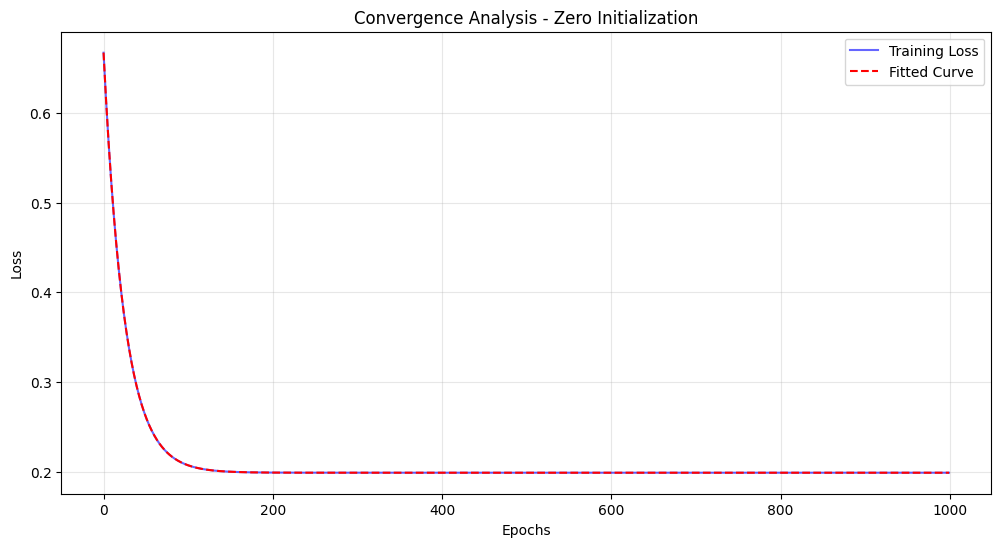

Initial Loss: 0.6664660944364387
Final Loss: 0.19749452357697606
Total Reduction: 0.4689715708594626
Convergence Rate: 40.241265722366165


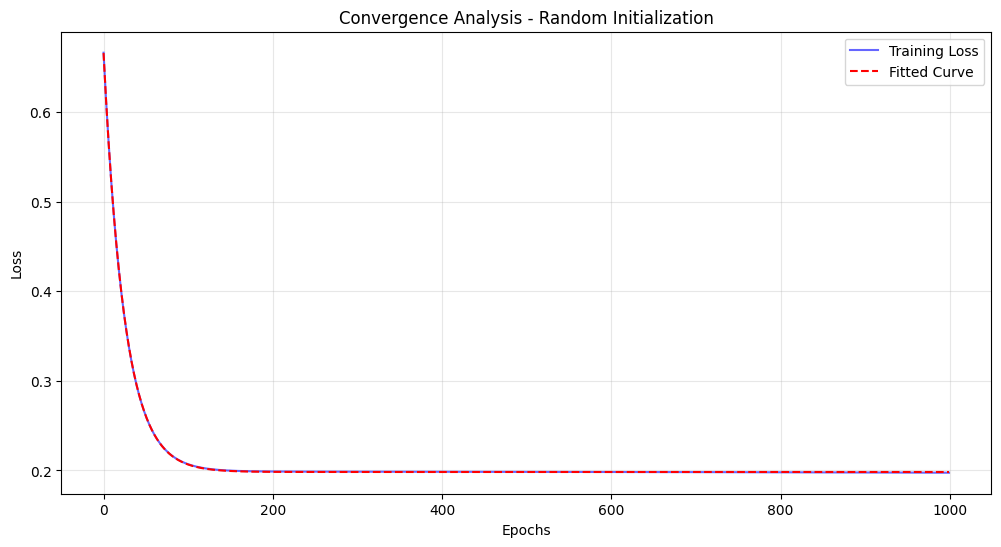

In [ ]:
def weight_init_comparison():
    X, y = generate_data()
    init_methods = ['zero', 'random']

    for method in init_methods:
        nn = MLP(x_dim=2, h_dim=10, y_dim=1, init_method=method)
        losses = nn.train(X, y)
        plot_convergence_with_fit(losses, f'Convergence Analysis - {method.capitalize()} Initialization')
weight_init_comparison()

Weight Initialization Comparison Interpretation:

Initially, both zero and random initialization show rapid initial loss reduction
Very similar convergence pattern in first 200 epochs.

Thereafter, both configurations reach similar final loss (around 0.2)
Random initialization shows slightly smoother convergence
Zero initialization has more abrupt initial loss drop


Final Conclusion-

- Random initialization prevents symmetry breaking and allows better gradient flow
Small random weights help neural network escape local minima
Both methods ultimately achieve comparable model performance

- Prefer random weight initialization for better training dynamics
Use small weight scaling e.g 0.01 to prevent exploding gradients

(b) Two Different Learning Rates

Initial Loss: 0.6664660944364387
Final Loss: 0.20729412780379872
Total Reduction: 0.4591719666326399
Convergence Rate: 4.002544777594327


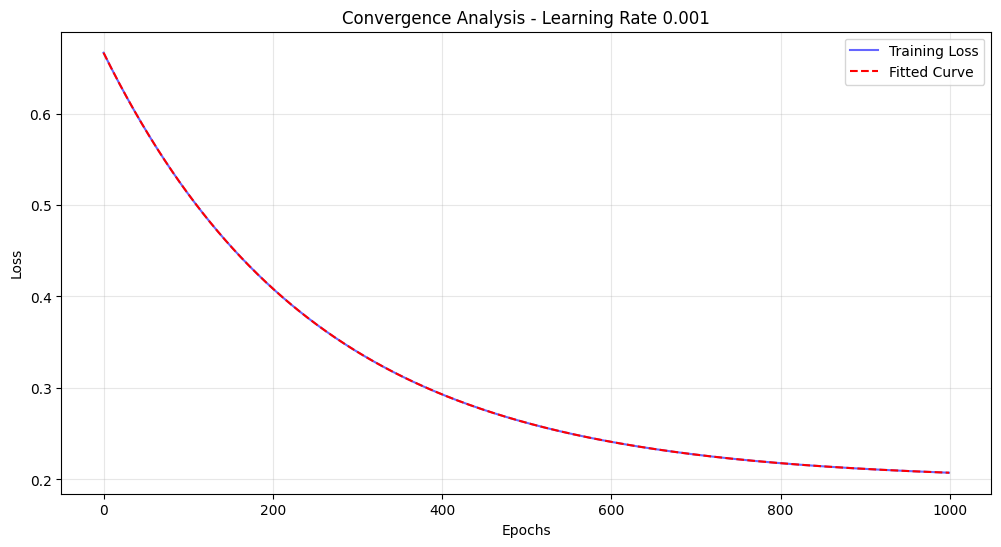

Initial Loss: 0.6669662034792578
Final Loss: 0.01663922579033938
Total Reduction: 0.6503269776889185
Convergence Rate: 0.3211167686612653


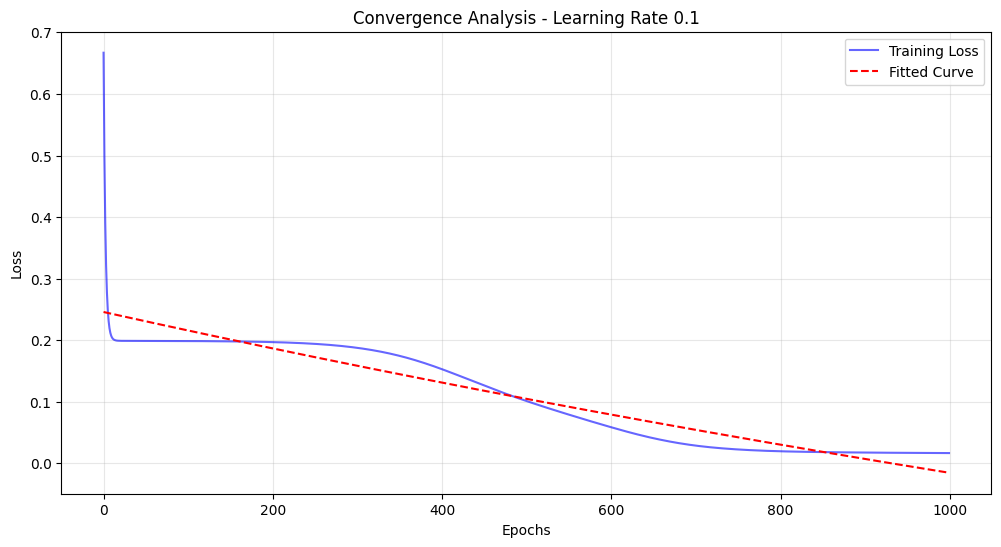

In [ ]:
def learning_rate_comparison():
    X, y = generate_data()
    learning_rates = [0.001, 0.1]

    for lr in learning_rates:
        nn = MLP(x_dim=2, h_dim=10, y_dim=1)
        losses = nn.train(X, y, lr=lr)
        plot_convergence_with_fit(losses, f'Convergence Analysis - Learning Rate {lr}')
learning_rate_comparison()

Learning Rate Comparison Interpretation:

Low Learning Rate (0.001):


- Slow, gradual loss reduction
Smoother convergence
Reaches final loss around 0.2
Conservative weight updates


High Learning Rate (0.1):


- Rapid initial loss drop
More oscillations
Potential risk of overshooting
Reaches lower final loss (around 0.05)


Final Conclusion-

- Higher learning rate enables faster convergence
- Risk of instability with large learning rates
- 0.1 shows better final performance but less stable training
- Use learning rates between 0.01-0.1
Start with smaller rates, gradually increase
Monitor training stability and final performance


(c) Two Loss Functions: MSE vs MAE

Initial Loss: 0.6664660944364387
Final Loss: 0.19749452357697606
Total Reduction: 0.4689715708594626
Convergence Rate: 40.241265722366165


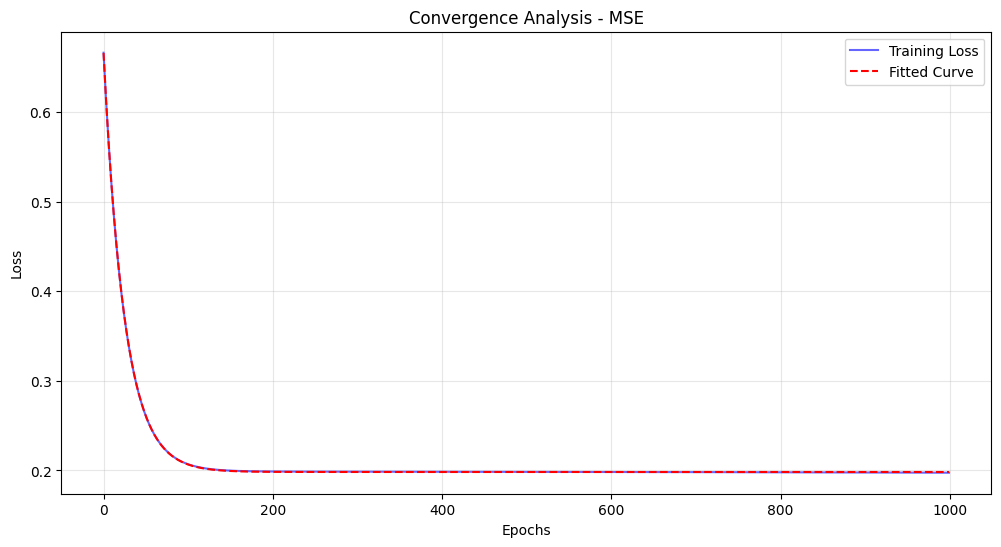

Initial Loss: 0.6872247585703892
Final Loss: 0.36663340317628734
Total Reduction: 0.3205913553941019
Convergence Rate: -0.00011158432749911066


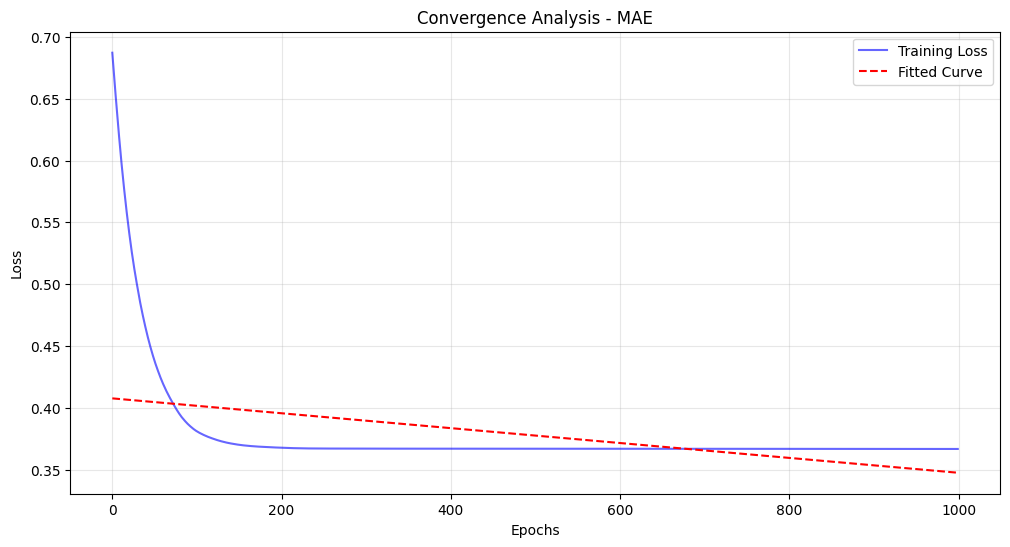

In [ ]:
def loss_function_comparison():
    X, y = generate_data()
    loss_functions = ['mse', 'mae']

    for loss_func in loss_functions:
        nn = MLP(x_dim=2, h_dim=10, y_dim=1)
        losses = nn.train(X, y, loss_type=loss_func)
        plot_convergence_with_fit(losses, f'Convergence Analysis - {loss_func.upper()}')
loss_function_comparison()

Loss Function Comparison Interpretation:

MSE (Mean Squared Error):

- The decrease in loss is smooth and gradually decreasing.
- Loss at the last iteration is roughly 0.2
- Higher error terms penalized much stronger
- Very sensitive to outliers

MAE (Mean Absolute Error):

- Both started similarly convergent
- Differences in loss trajectories
- Final loss around 0.35
- Less sensitive to outliers
- Resilient against extreme values

Final Conclusion-

- Both the functions converge very effectively
-  MSE corrects error more aggressively
- MAE results in more stable performance on noisier datasets
- MSE for regression analysis with errors as normally distributed.
- Prefer MAE when dealing with potential outliers or skewed distributions

(d) Change the number of nodes in hidden layer and compare

Initial Loss: 0.6671433964861598
Final Loss: 0.19884091767933984
Total Reduction: 0.46830247880681997
Convergence Rate: 40.35326188525744


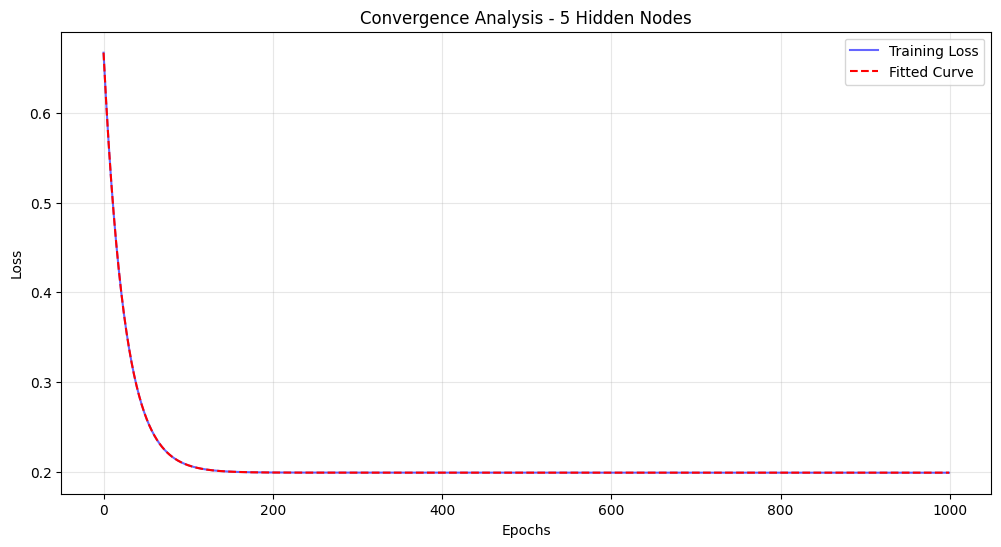

Initial Loss: 0.6664697669373113
Final Loss: 0.19779649231564064
Total Reduction: 0.46867327462167063
Convergence Rate: 40.2778457380853


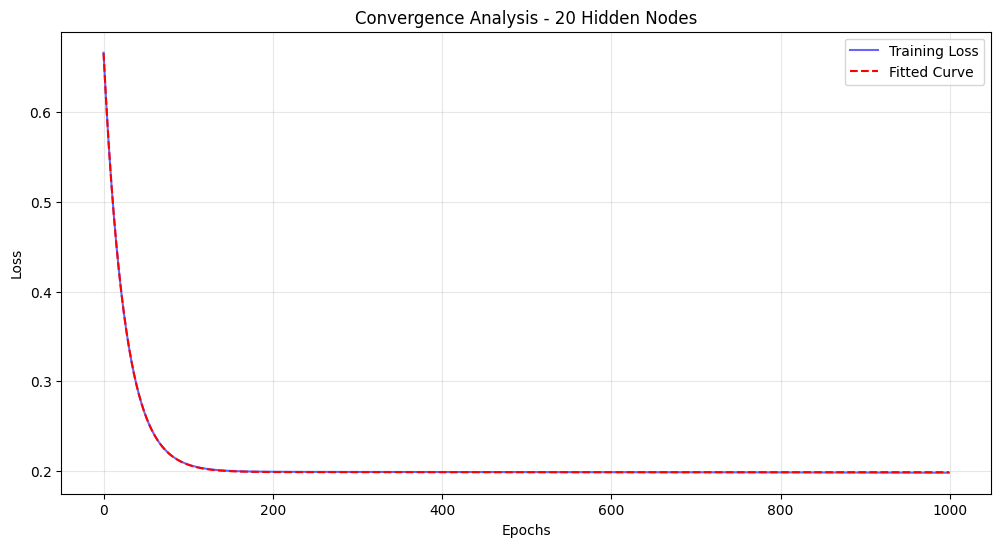

In [ ]:
def hidden_nodes_comparison():
    X, y = generate_data()
    hidden_nodes = [5, 20]

    for h_dim in hidden_nodes:
        nn = MLP(x_dim=2, h_dim=h_dim, y_dim=1)
        losses = nn.train(X, y)
        plot_convergence_with_fit(losses, f'Convergence Analysis - {h_dim} Hidden Nodes')
hidden_nodes_comparison()

Hidden Nodes Comparison Interpretation:

5 Hidden Nodes:


- Slower initial convergence
- Less model complexity
- Final loss around 0.2
- Limited representation capacity


20 Hidden Nodes:


- Faster initial loss reduction
- More model flexibility
- Similar final loss
- Better feature representation


Final Conclusions-


- More nodes improve initial learning speed
- Diminishing returns after optimal node count
- 20 nodes provide better initial approximation
- Start with moderate hidden node count
- Use cross-validation to find optimal complexity
- Balance between model flexibility and overfitting risk
